In [15]:
import pandas as pd
import sklearn.datasets as ds
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from scipy import special, stats

In [16]:
california_ds = ds.fetch_california_housing()
df = pd.DataFrame(california_ds.data, columns=california_ds.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


a) skalowanie: [0, 1]

skalowanie jest dobrym wyborem, gdy rozkład wartości przypomina rozkład normalny, jednakże nie musi być to regułą

nie zmienia kształtu danych

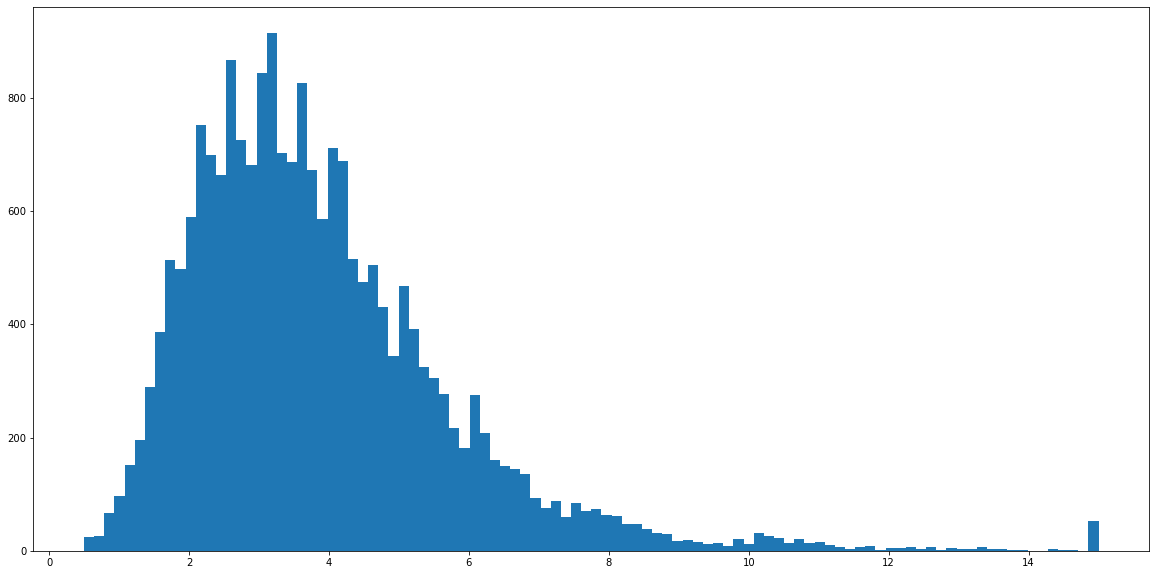

In [17]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.hist(df['MedInc'], bins=100)
plt.show()

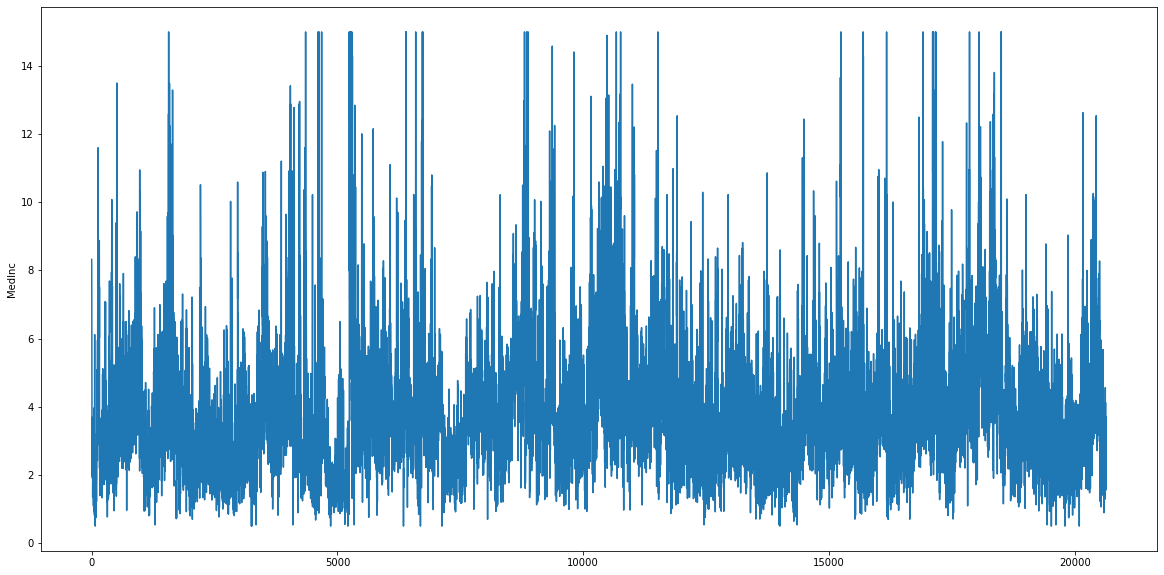

In [18]:
plt.plot(list(range(len(df['MedInc']))), df['MedInc'])
plt.ylabel('MedInc')
plt.show()

Jak to wygląda "pod spodem":

    X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

    X_scaled = X_std * (max - min) + min

In [19]:
reshaped_med_inc = np.asarray(df['MedInc']).reshape(-1, 1)
scale = MinMaxScaler().fit(reshaped_med_inc)
df['MedInc'] = scale.transform(reshaped_med_inc)

Rozkład się nie zmienia

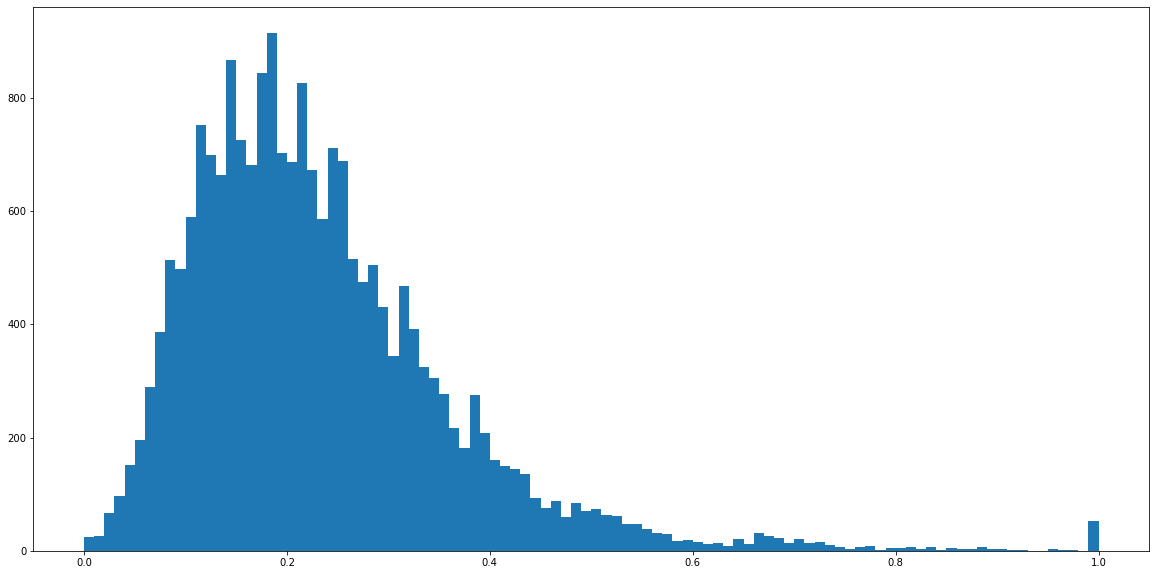

In [20]:
plt.hist(df['MedInc'], bins=100)
plt.show()

Ale wartości już tak

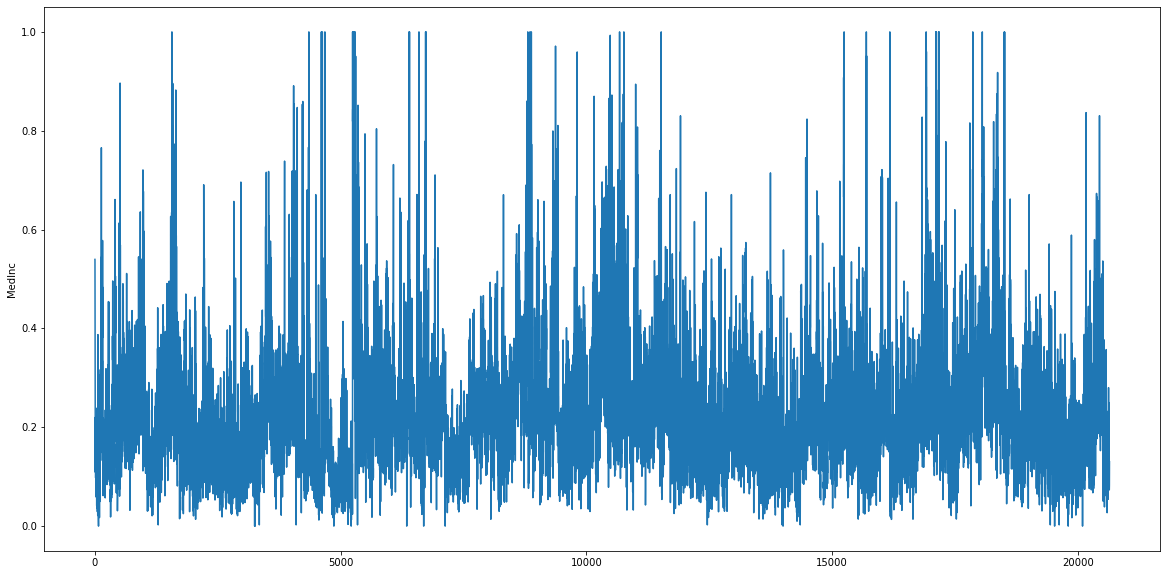

In [21]:
plt.plot(list(range(len(df['MedInc']))), df['MedInc'])
plt.ylabel('MedInc')
plt.show()

b) normalizacja: N(0, 1)

normalizacja jest dobrym wyborem, gdy rozkład wartości __nie__ przypomina rozkładu normalnego

zmieniamy wtedy kształt rozkładu danych

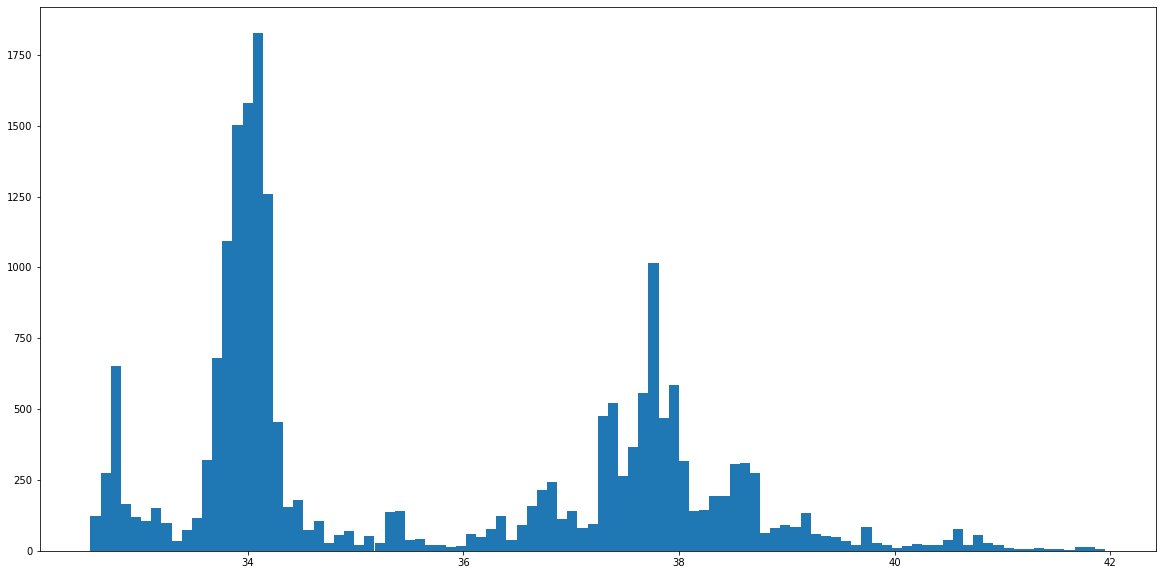

In [22]:
plt.hist(df['Latitude'], bins=100)
plt.show()

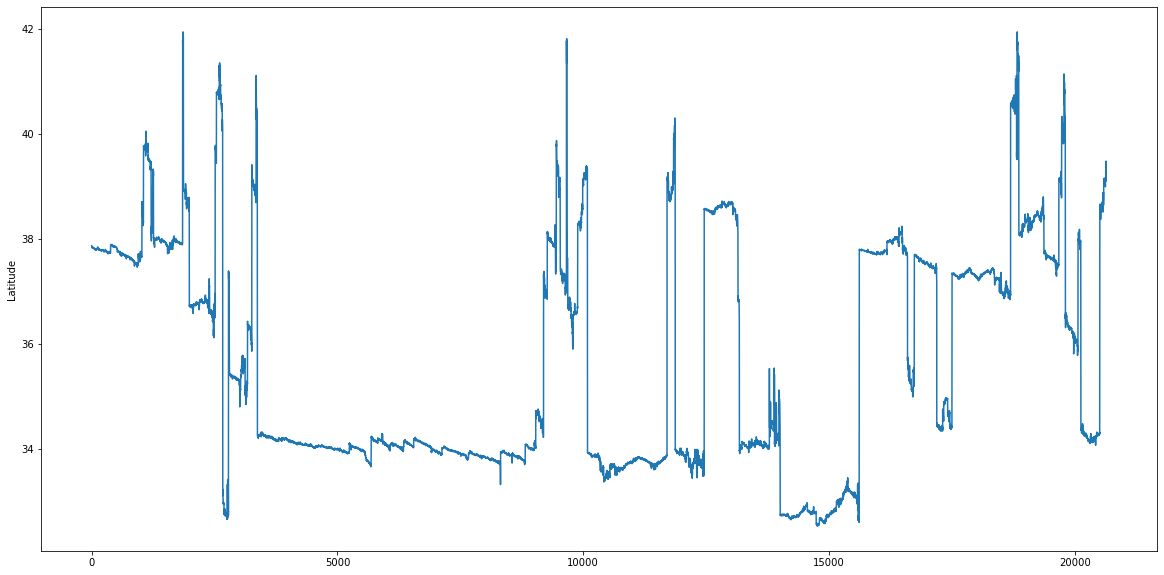

In [23]:
plt.plot(list(range(len(df['Latitude']))), df['Latitude'])
plt.ylabel('Latitude')
plt.show()

- Metoda nr 1: Z-Score

In [24]:
df_copy = df.copy()
mean = np.mean(df_copy['Latitude'])
std = np.std(df_copy['Latitude'])
df_copy['Latitude'] = df_copy['Latitude'].apply(lambda x: (x - mean) / std)

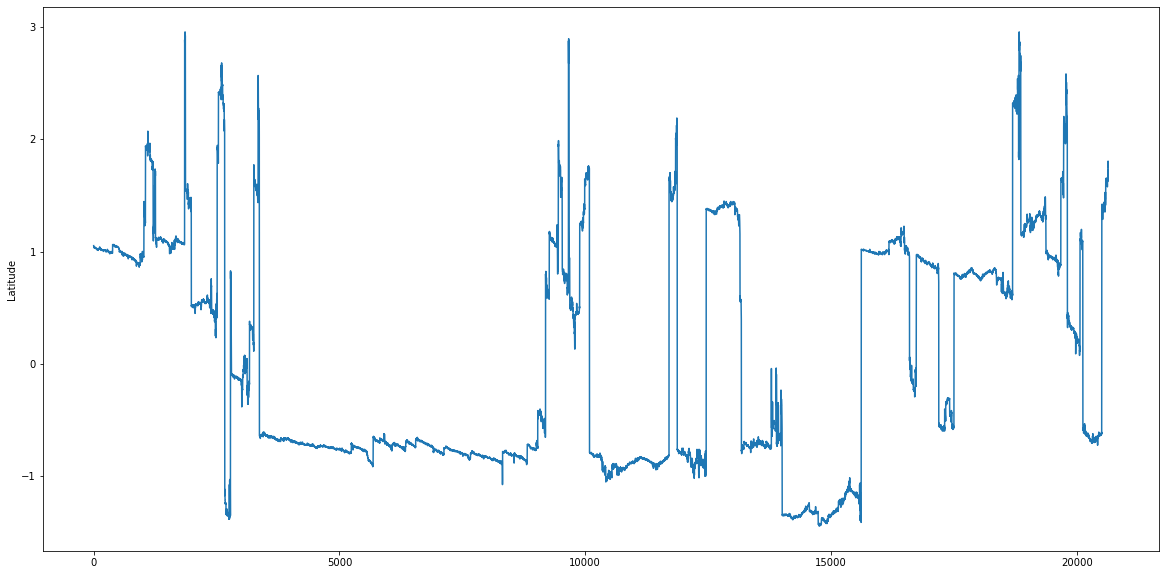

In [25]:
plt.plot(list(range(len(df_copy['Latitude']))), df_copy['Latitude'])
plt.ylabel('Latitude')
plt.show()

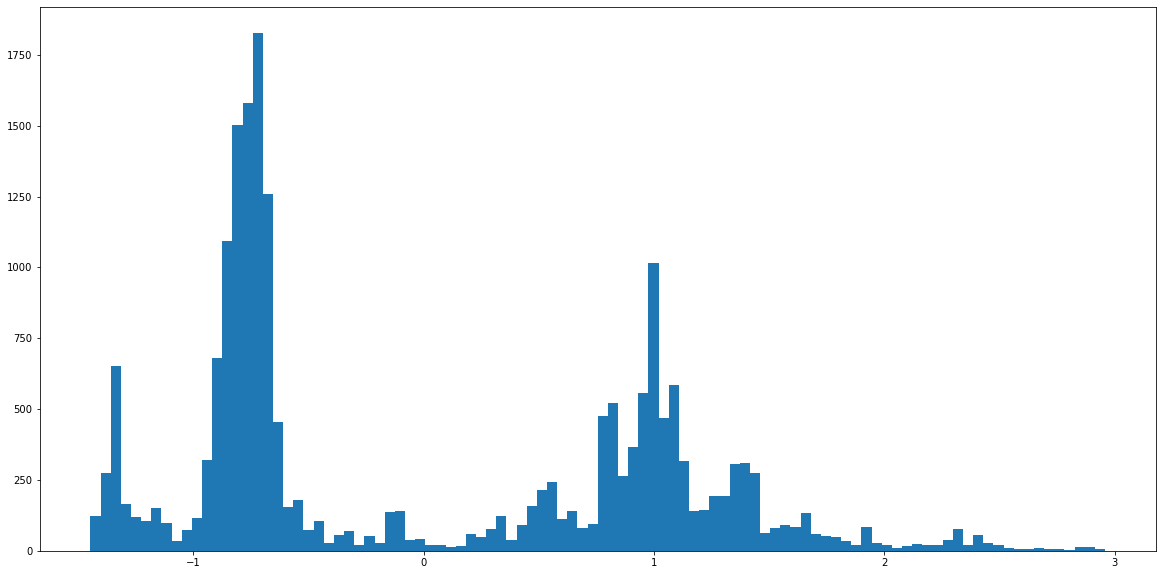

In [26]:
plt.hist(df_copy['Latitude'], bins=100)
plt.show()

- Metoda nr 2 : BoxCox

>  "At the core of the Box Cox transformation is an exponent, lambda (λ), which varies from -5 to 5. All values of λ are considered and the optimal value for your data is selected; The “optimal value” is the one which results in the best approximation of a normal distribution curve. The transformation of Y has the form:
![box-cox-formula](boxcox-formula-1.png)
-- https://www.statisticshowto.com/box-cox-transformation/

In [27]:
# Poniższa implementacja BoxCox wymaga, żeby wartości były silnie pozytywne. Dlatego do wartości zerowych dodana zostanie
# bardzo mała stała
df_copy = df.copy()
c = 1e-5
df_copy.loc[df_copy[df_copy['Latitude'] == 0].index, 'Latitude'] = c
df_copy['Latitude'], _ = stats.boxcox(df['Latitude'])

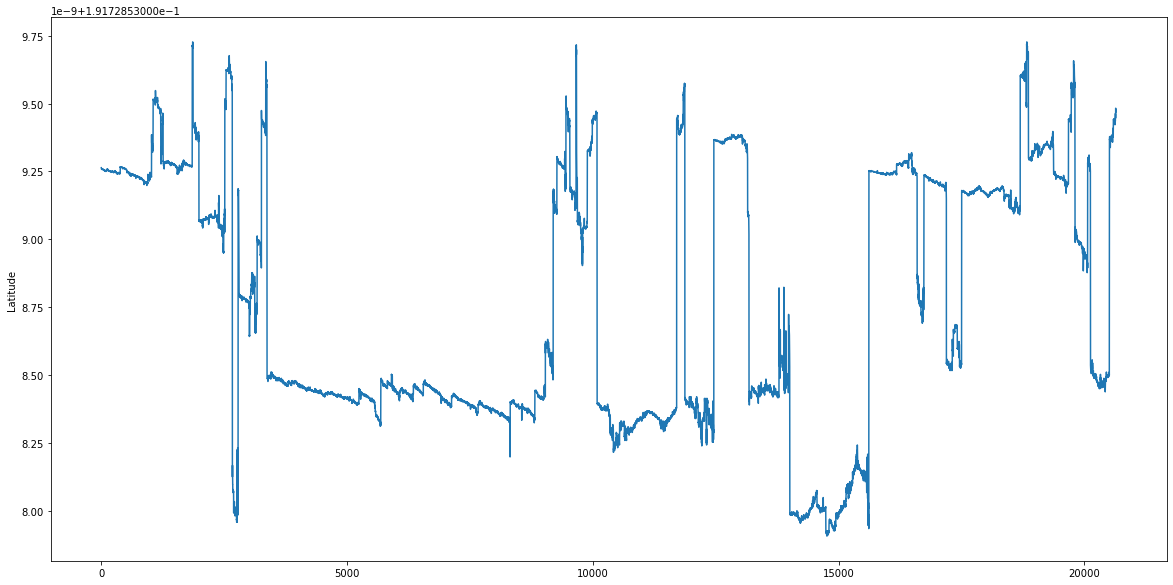

In [28]:
plt.plot(list(range(len(df_copy['Latitude']))), df_copy['Latitude'])
plt.ylabel('Latitude')
plt.show()

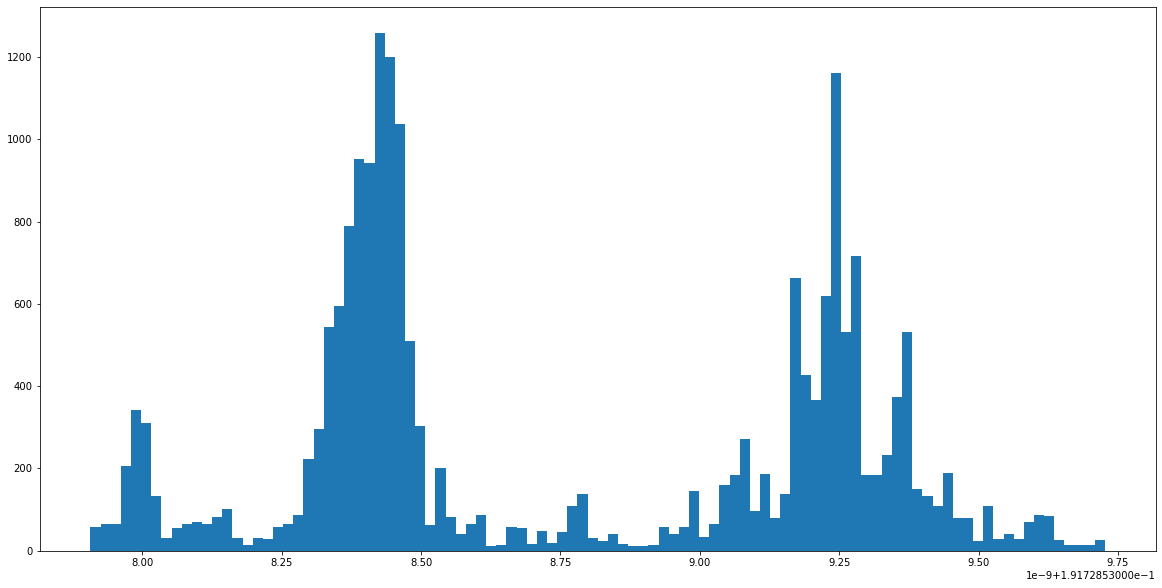

In [29]:
plt.hist(df_copy['Latitude'], bins=100)
plt.show()